In [36]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import joblib
import scipy.stats as stats
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score
from time import time
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score

import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=DeprecationWarning)


data = pd.read_csv('games_details.csv')
data.head(30)

<ipython-input-36-240f465d0c7f>:25: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('games_details.csv')


,GAME_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_CITY,PLAYER_ID,PLAYER_NAME,NICKNAME,START_POSITION,COMMENT,MIN,...,OREB,DREB,REB,AST,STL,BLK,TO,PF,PTS,PLUS_MINUS
0,22100213,1610612764,WAS,Washington,203484,Kentavious Caldwell-Pope,Kentavious,F,NaN,27:41,...,1.0,5.0,6.0,2.0,1.0,0.0,1.0,0.0,3.0,2.0
1,22100213,1610612764,WAS,Washington,1628398,Kyle Kuzma,Kyle,F,NaN,30:28,...,1.0,4.0,5.0,3.0,1.0,2.0,1.0,1.0,5.0,-14.0
2,22100213,1610612764,WAS,Washington,1629655,Daniel Gafford,Daniel,C,NaN,24:21,...,2.0,7.0,9.0,1.0,2.0,1.0,1.0,4.0,20.0,-2.0
3,22100213,1610612764,WAS,Washington,203078,Bradley Beal,Bradley,G,NaN,35:07,...,0.0,3.0,3.0,7.0,2.0,0.0,2.0,3.0,24.0,-9.0
4,22100213,1610612764,WAS,Washington,203915,Spencer Dinwiddie,Spencer,G,NaN,28:34,...,0.0,3.0,3.0,2.0,0.0,0.0,2.0,1.0,0.0,-5.0
5,22100213,1610612764,WAS,Washington,203526,Raul Neto,Raul,NaN,NaN,17:59,...,0.0,0.0,0.0,3.0,0.0,0.0,3.0,2.0,2.0,-8.0
6,22100213,1610612764,WAS,Washington,1626149,Montrezl Harrell,Montrezl,NaN,NaN,22:12,...,5.0,4.0,9.0,2.0,0.0,1.0,0.0,0.0,15.0,-11.0
7,22100213,1610612764,WAS,Washington,1630166,Deni Avdija,Deni,NaN,NaN,24:59,...,2.0,9.0,11.0,0.0,0.0,1.0,0.0,1.0,9.0,-10.0
8,22100213,1610612764,WAS,Washington,1630557,Corey Kispert,Corey,NaN,NaN,11:25,...,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,6.0,-1.0
9,22100213,1610612764,WAS,Washington,1628988,Aaron Holiday,Aaron,NaN,NaN,12:53,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,3.0,-1.0


In [37]:
data.isnull().sum()

GAME_ID                   0
TEAM_ID                   0
TEAM_ABBREVIATION         0
TEAM_CITY                 0
PLAYER_ID                 0
PLAYER_NAME               0
NICKNAME             615626
START_POSITION       386736
COMMENT              523752
MIN                  102360
FGM                  102360
FGA                  102360
FG_PCT               102360
FG3M                 102360
FG3A                 102360
FG3_PCT              102360
FTM                  102360
FTA                  102360
FT_PCT               102360
OREB                 102360
DREB                 102360
REB                  102360
AST                  102360
STL                  102360
BLK                  102360
TO                   102360
PF                   102360
PTS                  102360
PLUS_MINUS           126021
dtype: int64

### Clean continuous variables
    1. Fill in missing values
    2. Drop irrelevant/repetitive rows that have null values 
    3. convert name attributes into numerical

In [38]:

# data.dropna(axis=0,how='all')

# Get names of indexes for which column Age has value 30
indexNames = data[ data['FGM'].isnull() ].index
# Delete these row indexes from dataFrame
data.drop(indexNames , inplace=True)
data.head(30)

,GAME_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_CITY,PLAYER_ID,PLAYER_NAME,NICKNAME,START_POSITION,COMMENT,MIN,...,OREB,DREB,REB,AST,STL,BLK,TO,PF,PTS,PLUS_MINUS
0,22100213,1610612764,WAS,Washington,203484,Kentavious Caldwell-Pope,Kentavious,F,NaN,27:41,...,1.0,5.0,6.0,2.0,1.0,0.0,1.0,0.0,3.0,2.0
1,22100213,1610612764,WAS,Washington,1628398,Kyle Kuzma,Kyle,F,NaN,30:28,...,1.0,4.0,5.0,3.0,1.0,2.0,1.0,1.0,5.0,-14.0
2,22100213,1610612764,WAS,Washington,1629655,Daniel Gafford,Daniel,C,NaN,24:21,...,2.0,7.0,9.0,1.0,2.0,1.0,1.0,4.0,20.0,-2.0
3,22100213,1610612764,WAS,Washington,203078,Bradley Beal,Bradley,G,NaN,35:07,...,0.0,3.0,3.0,7.0,2.0,0.0,2.0,3.0,24.0,-9.0
4,22100213,1610612764,WAS,Washington,203915,Spencer Dinwiddie,Spencer,G,NaN,28:34,...,0.0,3.0,3.0,2.0,0.0,0.0,2.0,1.0,0.0,-5.0
5,22100213,1610612764,WAS,Washington,203526,Raul Neto,Raul,NaN,NaN,17:59,...,0.0,0.0,0.0,3.0,0.0,0.0,3.0,2.0,2.0,-8.0
6,22100213,1610612764,WAS,Washington,1626149,Montrezl Harrell,Montrezl,NaN,NaN,22:12,...,5.0,4.0,9.0,2.0,0.0,1.0,0.0,0.0,15.0,-11.0
7,22100213,1610612764,WAS,Washington,1630166,Deni Avdija,Deni,NaN,NaN,24:59,...,2.0,9.0,11.0,0.0,0.0,1.0,0.0,1.0,9.0,-10.0
8,22100213,1610612764,WAS,Washington,1630557,Corey Kispert,Corey,NaN,NaN,11:25,...,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,6.0,-1.0
9,22100213,1610612764,WAS,Washington,1628988,Aaron Holiday,Aaron,NaN,NaN,12:53,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,3.0,-1.0


#### Drop irrelevant/repetitive variables such as NICKNAME and COMMENT

In [39]:
data.drop(['NICKNAME'], axis=1, inplace=True)
data.drop(['COMMENT'], axis=1, inplace=True)
data.drop(['TEAM_ABBREVIATION'], axis=1, inplace=True)
data.drop(['TEAM_CITY'], axis=1, inplace=True)

#### convert name attributes into numerical
#### remove rest NaN

In [40]:
START_POSITION_num = {'F': 1, 'C': 2,  'G': 3 }
data['START_POSITION'] = data['START_POSITION'].map(START_POSITION_num)
data['START_POSITION'] = data['START_POSITION'].replace(np.nan, 4)
data['PLUS_MINUS'].fillna(data['PLUS_MINUS'].mean(), inplace=True)
data.isnull().sum()
data.head(20)


,GAME_ID,TEAM_ID,PLAYER_ID,PLAYER_NAME,START_POSITION,MIN,FGM,FGA,FG_PCT,FG3M,...,OREB,DREB,REB,AST,STL,BLK,TO,PF,PTS,PLUS_MINUS
0,22100213,1610612764,203484,Kentavious Caldwell-Pope,1.0,27:41,1.0,6.0,0.167,0.0,...,1.0,5.0,6.0,2.0,1.0,0.0,1.0,0.0,3.0,2.0
1,22100213,1610612764,1628398,Kyle Kuzma,1.0,30:28,2.0,12.0,0.167,1.0,...,1.0,4.0,5.0,3.0,1.0,2.0,1.0,1.0,5.0,-14.0
2,22100213,1610612764,1629655,Daniel Gafford,2.0,24:21,9.0,12.0,0.750,0.0,...,2.0,7.0,9.0,1.0,2.0,1.0,1.0,4.0,20.0,-2.0
3,22100213,1610612764,203078,Bradley Beal,3.0,35:07,9.0,20.0,0.450,5.0,...,0.0,3.0,3.0,7.0,2.0,0.0,2.0,3.0,24.0,-9.0
4,22100213,1610612764,203915,Spencer Dinwiddie,3.0,28:34,0.0,5.0,0.000,0.0,...,0.0,3.0,3.0,2.0,0.0,0.0,2.0,1.0,0.0,-5.0
5,22100213,1610612764,203526,Raul Neto,4.0,17:59,1.0,6.0,0.167,0.0,...,0.0,0.0,0.0,3.0,0.0,0.0,3.0,2.0,2.0,-8.0
6,22100213,1610612764,1626149,Montrezl Harrell,4.0,22:12,6.0,9.0,0.667,0.0,...,5.0,4.0,9.0,2.0,0.0,1.0,0.0,0.0,15.0,-11.0
7,22100213,1610612764,1630166,Deni Avdija,4.0,24:59,2.0,9.0,0.222,1.0,...,2.0,9.0,11.0,0.0,0.0,1.0,0.0,1.0,9.0,-10.0
8,22100213,1610612764,1630557,Corey Kispert,4.0,11:25,2.0,4.0,0.500,0.0,...,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,6.0,-1.0
9,22100213,1610612764,1628988,Aaron Holiday,4.0,12:53,1.0,6.0,0.167,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,3.0,-1.0


In [41]:
data.isnull().sum()

GAME_ID           0
TEAM_ID           0
PLAYER_ID         0
PLAYER_NAME       0
START_POSITION    0
MIN               0
FGM               0
FGA               0
FG_PCT            0
FG3M              0
FG3A              0
FG3_PCT           0
FTM               0
FTA               0
FT_PCT            0
OREB              0
DREB              0
REB               0
AST               0
STL               0
BLK               0
TO                0
PF                0
PTS               0
PLUS_MINUS        0
dtype: int64

### EDA (Explorratory data analysis)
    1. compare atributes agaisnt START_POSITION
    2. compare attribute average with the rest of the attributes

<Figure size 432x288 with 0 Axes>

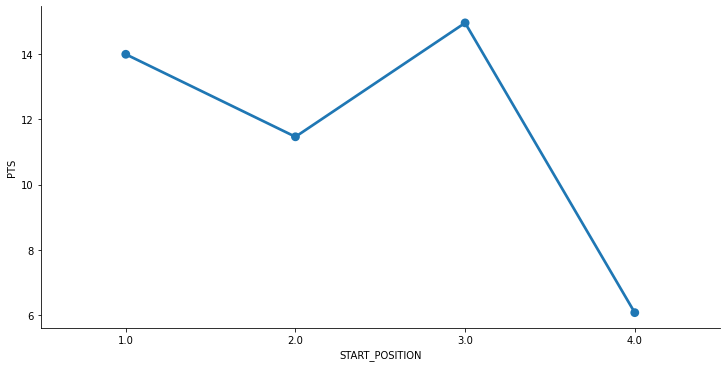

In [42]:
for i, col in enumerate(['START_POSITION']):
    plt.figure(i)
    sns.catplot(x=col, y='PTS', data=data, kind='point', aspect=2, )
# for i, col in enumerate(['START_POSITION']):
#     plt.figure(i)
#     sns.catplot(x=col, y='FGM', data=data, kind='point', aspect=2, )
# for i, col in enumerate(['START_POSITION']):
#     plt.figure(i)
#     sns.catplot(x=col, y='FGA', data=data, kind='point', aspect=2, )
# for i, col in enumerate(['TEAM_ID']):
#     plt.figure(i)
#     sns.catplot(x=col, y='REB', data=data, kind='point', aspect=2, )
# for i, col in enumerate(['START_POSITION']):
#     plt.figure(i)
#     sns.catplot(x=col, y='AST', data=data, kind='point', aspect=2, )
    

#### Here in the output of cell 6 we can see that species 1 has the smallest culmen_length_mm on average 
#### and species 3 has the smallest culmen_depth_mm and the most body_mass_g, flipper_length_mm on average 

In [43]:
data.groupby('START_POSITION').mean()

,GAME_ID,TEAM_ID,PLAYER_ID,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,...,OREB,DREB,REB,AST,STL,BLK,TO,PF,PTS,PLUS_MINUS
START_POSITION,,,,,,,,,,,,,,,,,,,,,
1.0,2.215954e+07,1.610613e+09,240466.773952,5.228064,11.276260,0.453485,0.979646,2.726299,0.234708,2.564739,...,1.514381,4.720294,6.234674,2.307434,0.953443,0.677141,1.681507,2.467991,14.000512,0.402417
2.0,2.215966e+07,1.610613e+09,229113.412023,4.548423,8.730521,0.514621,0.212708,0.619027,0.063029,2.159155,...,2.485175,5.584592,8.069767,1.577781,0.678681,1.255312,1.592156,2.841973,11.468710,0.270879
3.0,2.215956e+07,1.610613e+09,275092.921326,5.393966,12.288267,0.428880,1.460673,3.999259,0.308422,2.714960,...,0.694451,3.039964,3.734414,4.550323,1.153391,0.286909,2.117750,2.235741,14.963566,0.387032
4.0,2.109463e+07,1.610613e+09,398393.119669,2.241114,5.105259,0.382155,0.529401,1.526472,0.170116,1.061078,...,0.731658,2.022045,2.753703,1.275153,0.507842,0.314608,0.893321,1.634199,6.072689,-0.312074


This shows hoe each team did overall based on the team players.

In [44]:
data.groupby('TEAM_ID').mean()

,GAME_ID,PLAYER_ID,START_POSITION,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,...,OREB,DREB,REB,AST,STL,BLK,TO,PF,PTS,PLUS_MINUS
TEAM_ID,,,,,,,,,,,,,,,,,,,,,
1610612737,2.173676e+07,323119.973092,3.096093,3.491387,7.736152,0.408405,0.751295,2.130095,0.203693,1.681716,...,0.989980,2.943819,3.933799,2.108759,0.722810,0.448266,1.349865,1.955978,9.415785,-0.716633
1610612738,2.250973e+07,349665.866614,3.105149,3.471444,7.594268,0.416113,0.750849,2.109607,0.195577,1.698726,...,0.923089,2.966773,3.889862,2.103556,0.748036,0.437580,1.322824,2.053344,9.392463,0.914368
1610612739,2.216407e+07,265261.922961,3.082071,3.521720,7.832504,0.405754,0.768379,2.153631,0.195530,1.726393,...,1.072175,3.021859,4.094035,2.034662,0.681612,0.421591,1.303852,1.938056,9.538212,-0.190434
1610612740,2.085641e+07,287192.185201,3.072553,3.637954,8.033902,0.416512,0.721868,2.032760,0.188987,1.687786,...,1.054280,3.063296,4.117576,2.131943,0.721988,0.455157,1.307706,1.993027,9.685561,-0.657026
1610612741,2.138030e+07,366959.982005,3.075593,3.578592,8.065983,0.408904,0.701823,1.964359,0.187405,1.693320,...,1.107565,3.150428,4.257993,2.150661,0.704502,0.486634,1.370625,2.019568,9.552327,-0.135303
1610612742,2.168055e+07,310218.374802,3.113291,3.504605,7.684268,0.419870,0.793090,2.223094,0.206860,1.688791,...,0.970192,2.975860,3.946052,2.014713,0.678328,0.438668,1.180208,1.901422,9.491090,0.896501
1610612743,2.164428e+07,331114.265665,3.072737,3.759445,8.139714,0.426972,0.755068,2.140578,0.199021,1.919719,...,1.110401,3.108270,4.218671,2.275052,0.787203,0.496372,1.387929,2.080223,10.193677,0.742613
1610612744,2.216274e+07,295493.957972,3.095103,3.732345,8.040473,0.430200,0.908672,2.430824,0.199485,1.666389,...,0.996225,3.053742,4.049967,2.300522,0.782090,0.506884,1.355874,2.045747,10.039751,0.995544
1610612745,2.179386e+07,235822.913291,3.047781,3.669285,8.177874,0.413602,1.006625,2.848332,0.210493,1.871490,...,1.068242,3.207305,4.275547,2.122823,0.778273,0.463798,1.417952,2.087530,10.216685,1.051459


# PCA Analysis

In [54]:
from sklearn.preprocessing import StandardScaler
scalar_data=data[data.columns.drop(['PLAYER_NAME','MIN'])]
scaler = StandardScaler()
scaler.fit(scalar_data)
scaled_data = scaler.transform(scalar_data)
from sklearn.decomposition import PCA
# scalar_data

pca = PCA(n_components=2)
pca.fit(scaled_data)

PCA(n_components=2)

In [57]:
x_pca = pca.transform(scaled_data)
scaled_data.shape

(523751, 23)

In [59]:
x_pca.shape

(523751, 2)

Text(0, 0.5, 'Second Principal Component')

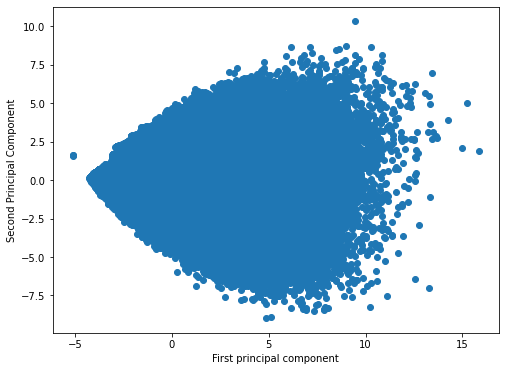

In [61]:
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1])
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

In [63]:
df_comp = pd.DataFrame(pca.components_,columns=scalar_data.columns)

<AxesSubplot:>

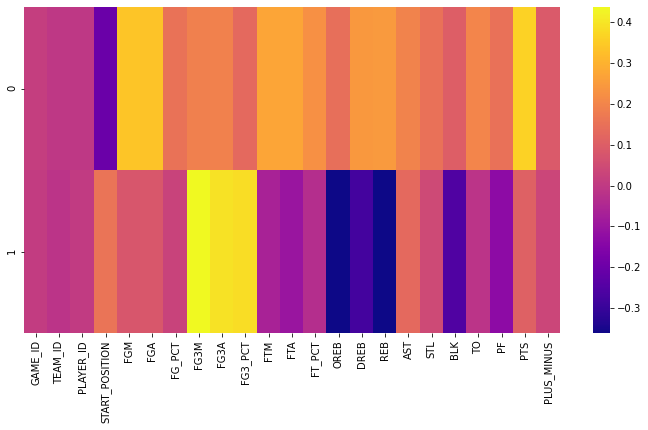

In [64]:
plt.figure(figsize=(12,6))
sns.heatmap(df_comp,cmap='plasma',)